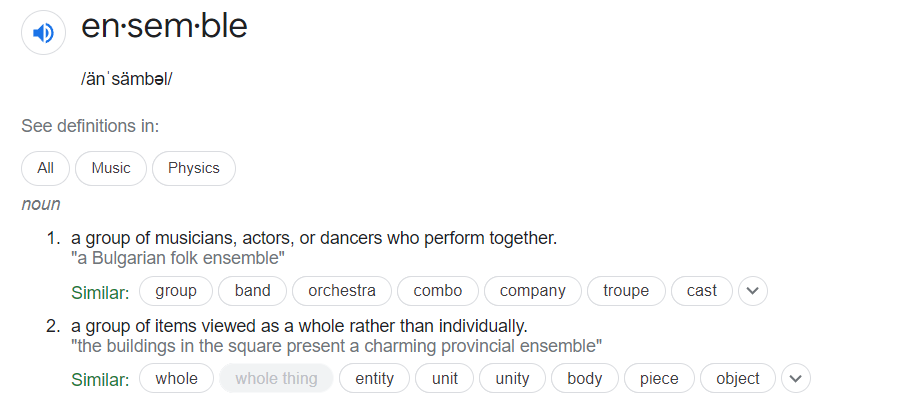

https://en.wikipedia.org/wiki/Ensemble_learning

# Ensemble learning

- In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


-  Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

https://scikit-learn.org/stable/modules/ensemble.html

- The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.


- Two families of ensemble methods are usually distinguished:


- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. 
- On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.


    - Examples: Bagging methods, Forests of randomized trees, …



- By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator.
- The motivation is to combine several weak models to produce a powerful ensemble.

    - Examples: AdaBoost, Gradient Tree Boosting, …

     ____________________________________________________    
     ____________________________________________________    
   _____________    _______________________________________    
    

    Group of Multiple Models : 
        used together . 
        creates a more powerful algorithm.
        
    multiple models  
    M1 M2 .... Mk . (called "Base learners")
    {______________}
        combine 
        
        
        = "M" --> more powerful 
                    (better performance)
                    
                    
____________________________________________________    

____________________________________________________    
        
### Types of Ensemble Model : 
    
    1. Bagging  -> Random Forest
    2. Boosting -> XGBoost 
    3. Stacking 
    4. Cascading  ---used in industry specific to domain . 
        


    
        

### Bagging : 


### Bagging meta-estimator

- In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction.
- These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. 
- In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm.
- As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).


- Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:

- When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting.

- When samples are drawn with replacement, then the method is known as Bagging.


- When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces.


- Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.


- In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. 

- In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement. 
- When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting oob_score=True. 


        >>> from sklearn.ensemble import BaggingClassifier
        >>> from sklearn.neighbors import KNeighborsClassifier
        >>> bagging = BaggingClassifier(KNeighborsClassifier(),
        ...                             max_samples=0.5, max_features=0.5)

### - Bootstrapped Aggregation  :

        -- Boostrap Sampling : 
            sampling with replacement 
            
        -- Aggregation: averaging , count, median
        
        


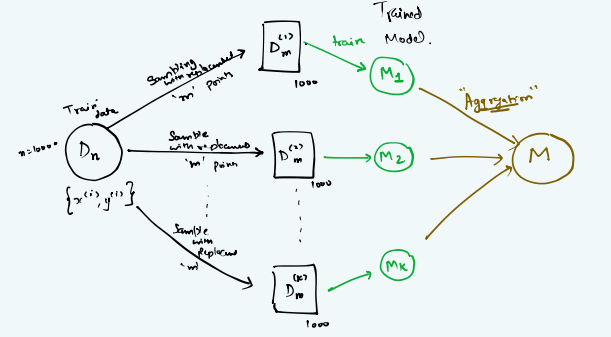

    from Dataset D :
    after train test split : 
        
    
    from X_train data , lets say n= 10,000 data points 
    
                   
    take m1 = 1000 Boostrap samples ... train model  M1
    take m2 = 1000 Boostrap samples ... train model  M2         M
    take m3 = 1000 Boostrap samples ... train model  M3     Aggregation
    .                                                          
    .
    .
    take mk = 1000 Boostrap samples ... train model  Mk
    
    
      M << n 
      
      
      
      In Classification: 
          aggregation we will do is Majority of predictions. 
        
      In regression : 
          aggregation can be done by taking average of prediction .
          (mean , median)
          
          
          
          

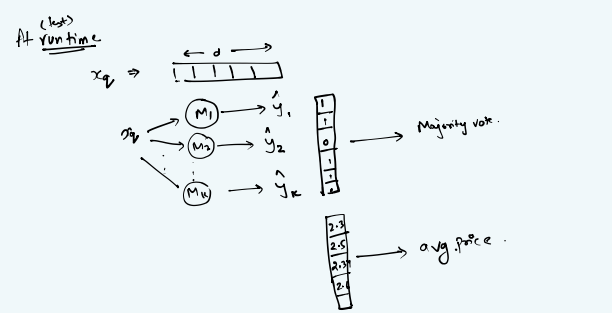

_____________________________________________
### Model Variance: 
    
    Complex model : High variance model : overfitting case: 
    in such case model is dependent on every single point . 
    ____________________________________________________
    
    if we drop some points from all learner. which happens in boostrapping .
    final model will not have a very high variance.
    
        
    
    - Using Bagging .overall  we can reduce the model variance. 
    
    
    
    In bagging,  all individual models with high variance + low bias.
    
    
    All base Learners : [High variance + Low Bias]
        (for example, kNN with small k neighbors, 
            decision tree with high depth)
            
    M :  aggregation of all learners . the final model : 
    will have REDUCED VARIANCE  + LOW BIAS. 
    
    
    Bagging can have no impact on biasness, thats why base learners(Mi) must have low bias . 

    More the Base learners , we tends to reduce variance more n more. 
    
    
    

## Forests of randomized trees

- The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: 
    - the RandomForest algorithm and
    - the Extra-Trees method.
- Both algorithms are perturb-and-combine techniques  specifically designed for trees. 
- This means a diverse set of classifiers is created by introducing randomness in the classifier construction.
- The prediction of the ensemble is given as the averaged prediction of the individual classifiers.


- As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array X of shape (n_samples, n_features) holding the training samples, and an array Y of shape (n_samples,) holding the target values (class labels) for the training samples:

        >>> from sklearn.ensemble import RandomForestClassifier
        >>> X = [[0, 0], [1, 1]]
        >>> Y = [0, 1]
        >>> clf = RandomForestClassifier(n_estimators=10)
        >>> clf = clf.fit(X, Y)

# Random Forest : 


- In random forests , each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.


- Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. 


- The purpose of these two sources of randomness is to decrease the variance of the forest estimator. 
- Indeed, individual decision trees typically exhibit high variance and tend to overfit. 
- The injected randomness in forests yield decision trees with somewhat decoupled prediction errors.
- By taking an average of those predictions, some errors can cancel out.
- Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. 
- In practice the variance reduction is often significant hence yielding an overall better model.


- the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.


## Extremely Randomized Trees

- In extremely randomized trees , randomness goes one step further in the way splits are computed. 
- As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. 
- This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:


        >>> from sklearn.model_selection import cross_val_score
        >>> from sklearn.datasets import make_blobs
        >>> from sklearn.ensemble import RandomForestClassifier
        >>> from sklearn.ensemble import ExtraTreesClassifier
        >>> from sklearn.tree import DecisionTreeClassifier

        >>> X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
        ...     random_state=0)

        >>> clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
        ...     random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean()
        0.98...

        >>> clf = RandomForestClassifier(n_estimators=10, max_depth=None,
        ...     min_samples_split=2, random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean()
        0.999...

        >>> clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
        ...     min_samples_split=2, random_state=0)
        >>> scores = cross_val_score(clf, X, y, cv=5)
        >>> scores.mean() > 0.999
        True

        - grouped multiple trees : 
        
     - Bootstrap sampling : 
        all trees get different bootstrapped data : 
                    
                        (Base Model)
        Random Forst : Decision Tree + Row sampling + Feature Sampling  +  Aggregation 
        
        
        
        # of sampling << # of entire data points
        # of feature sampling  << #  of all features. 
        
        